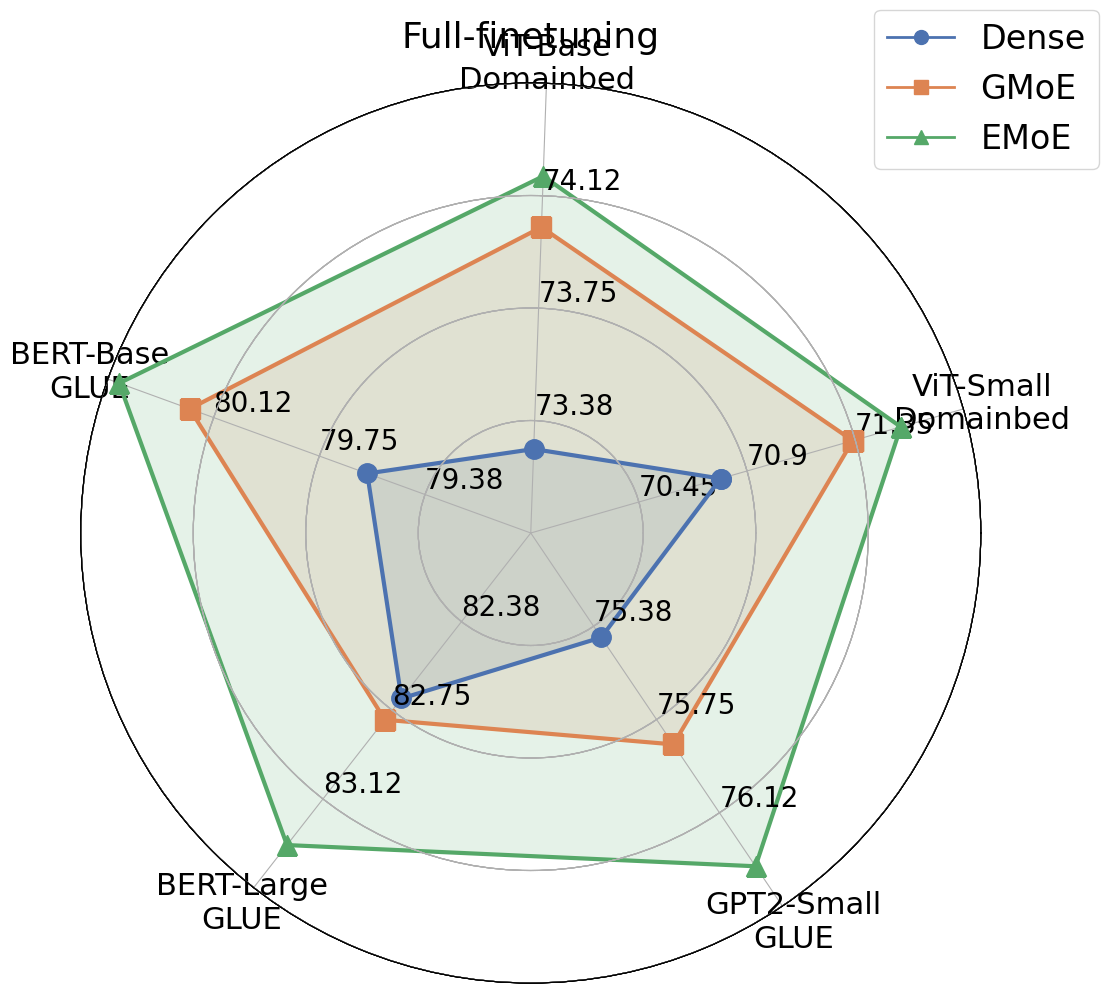

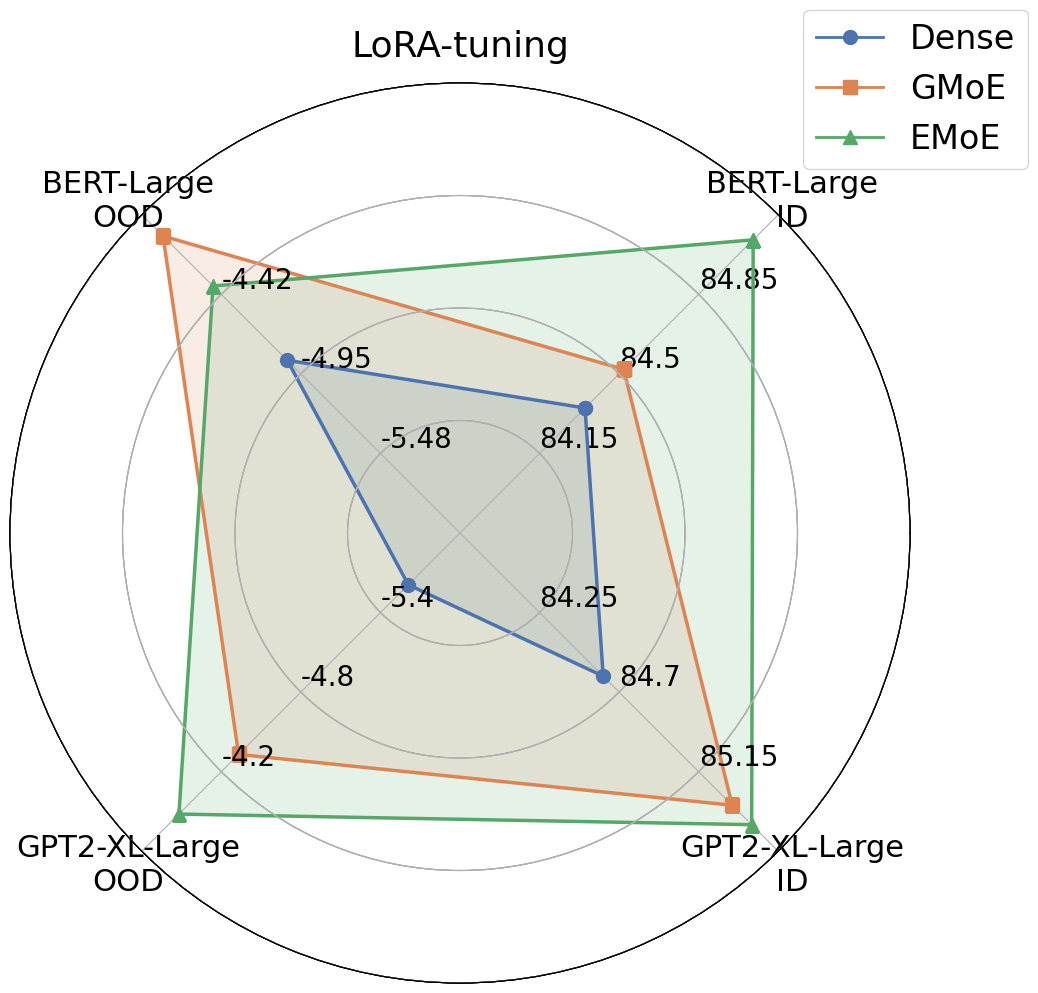

In [18]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6, beginning=0):
        angles = np.arange(0+beginning, 360+beginning, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables,
                                         fontsize=22
                                         )
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            gridlabel[-1] = "" # clean up origin
            ax.set_rgrids(grid, 
                          labels=gridlabel,
                         angle=angles[i],
                         fontsize=20)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)



# 数据和范围
variables = ["ViT-Small\nDomainbed", "ViT-Base\nDomainbed", "BERT-Base\nGLUE", "BERT-Large\nGLUE", "GPT2-Small\nGLUE"]
ranges = [(70, 71.8), (73, 74.5), (79, 80.5), (82, 83.5), (75, 76.5)]

colors = ["#4c72b0", "#dd8452", "#55a868"]  
methods = ["Dense", "GMoE", "EMoE"]

data1 = [70.79, 73.28, 79.58, 82.70, 75.42]
data2 = [71.34, 74.02, 80.21, 82.79, 75.85]
data3 = [71.54, 74.19, 80.46, 83.32, 76.34]


fig1 = plt.figure(figsize=(10, 10))
radar = ComplexRadar(fig1, variables, ranges, n_ordinate_levels=5, beginning=16)


radar.plot(data1, linewidth=3, markersize=14, marker="o", color=colors[0], label=methods[0])
radar.fill(data1, color=colors[0], alpha=0.15)

radar.plot(data2, linewidth=3, markersize=14, marker="s", color=colors[1], label=methods[1])
radar.fill(data2, color=colors[1], alpha=0.15)

radar.plot(data3, linewidth=3, markersize=14, marker="^", color=colors[2], label=methods[2])
radar.fill(data3, color=colors[2], alpha=0.15)


# 手动创建图例
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[i], lw=2, marker=["o", "s", "^"][i], markersize=10, label=methods[i]) for i in range(len(methods))]
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.15, 1.1), fontsize=24)

plt.title("Full-finetuning", y=1.03, fontsize=26)
plt.savefig("compare.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("compare.png", bbox_inches="tight", pad_inches=0.0)
plt.show()



variables = ["BERT-Large\nID", "BERT-Large\nOOD", "GPT2-XL-Large\nOOD", "GPT2-XL-Large\nID"]
ranges = [(83.8, 85.2), (-6, -3.9), (-6, -3.6), (83.8, 85.6)]

seaborn_blue = "#4c72b0"
seaborn_orange = "#dd8452"
seaborn_green = "#55a868"




data1 = [84.35, -4.86, -5.61, 84.61]
data2 = [84.52, -4.04, -4.33, 85.34]
data3 = [85.09, -4.37, -3.88, 85.45]


fig2 = plt.figure(figsize=(10, 10))
radar = ComplexRadar(fig2, variables, ranges, n_ordinate_levels=5, beginning=45)


radar.plot(data1, linewidth=2.5, markersize=10, marker="o", color=colors[0], label=methods[0])
radar.fill(data1, color=colors[0], alpha=0.15)

radar.plot(data2, linewidth=2.5, markersize=10, marker="s", color=colors[1], label=methods[1])
radar.fill(data2, color=colors[1], alpha=0.15)

radar.plot(data3, linewidth=2.5, markersize=10, marker="^", color=colors[2], label=methods[2])
radar.fill(data3, color=colors[2], alpha=0.15)



from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[i], lw=2, marker=["o", "s", "^"][i], markersize=10, label=methods[i]) for i in range(len(methods))]


plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.15, 1.1), fontsize=24)


plt.title("LoRA-tuning", y=1.02, fontsize=26)
plt.savefig("compare_LoRA.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("compare_LoRA.png", bbox_inches="tight", pad_inches=0.0)
plt.show()